<a href="https://colab.research.google.com/github/HellCatCruiser/Prob-Stats/blob/main/Assignment2_P%26S_D_Linger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment II: Classification of flowers

by *David Linger #2741629*
started on 22/03/2025

### Outline
In this assignment you will analyze a well-known statistical classification problem. The
dataset consists of 50 samples from each of three species of Iris flowers (Iris setosa, Iris
virginica , and Iris versicolor). Four features were measured from each sample, namely
the length and the width of sepal and petal (in centimeters). One of the most famous
statisticians, sir Ronald Fisher, investigated if one can predict to which type a flower
belongs, based on these four characteristics. We consider a slightly simplified version
of this problem in which we only consider discrimination between two types of flower,
Iris versicolor (call this type 0) and Iris virginica (call this type 1) and will only use the
petal length and width for classification.
Figure 1: Left: Iris versicolor. Right: Iris virginica
.

### task description
The flower-data are available in R. Issue the following commands:
data(iris)
d <- iris
library(tidyverse)
x0 <- d %>% filter(Species=="versicolor") %>% select(3:4)
x1 <- d %>% filter(Species=="virginica") %>% select(3:4)


Now x0 and x1 contain the measurements of type 0 and 1 respectively.
###(Question: A)
Make a plot of petal width versus petal length representing all flowers (of Species
types versincolor and virginica) in the dataset. Use a different plotting character
or colour for both types of flowers.
1


In [ ]:
data(iris)
d <- iris
library(tidyverse)
x0 <- d %>% filter(Species=="versicolor") %>% select(3:4)
x1 <- d %>% filter(Species=="virginica") %>% select(3:4)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
?points

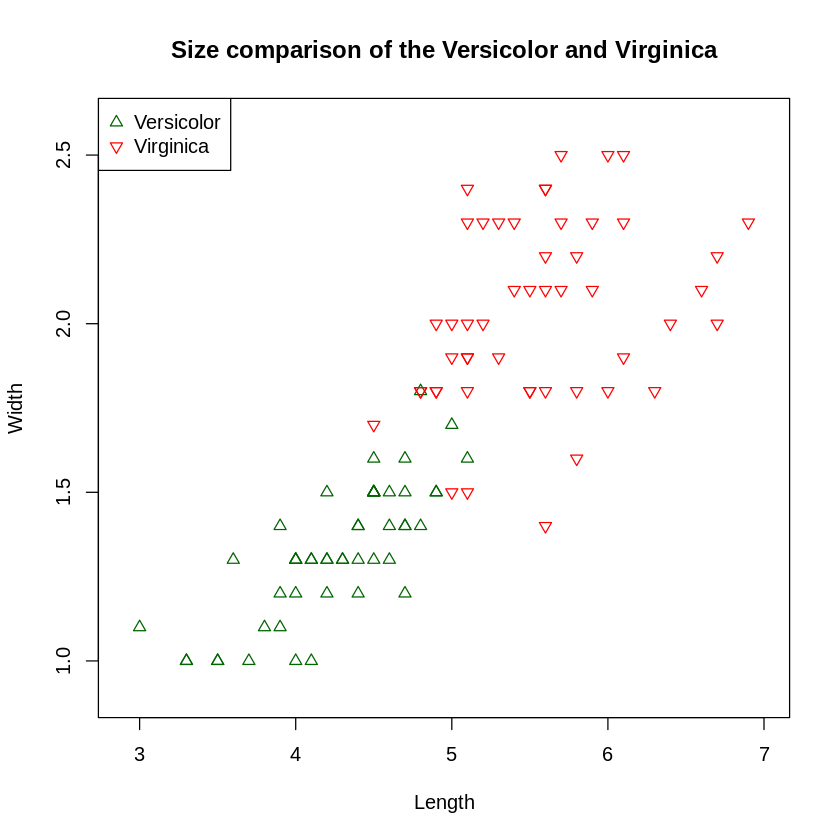

In [ ]:
# find the range of the petal width and length in the dataset
y_min <- min(c(min(x0$Petal.Width), min(x1$Petal.Width))) - .1
y_max <- max(c(max(x0$Petal.Width), max(x1$Petal.Width))) + .1
x_min <- min(c(min(x0$Petal.Length), min(x1$Petal.Length))) - .1
x_max <- max(c(max(x0$Petal.Length), max(x1$Petal.Length))) + .1

#Create the plot for x0(versicolor) (single coloring)
plot(x0,
  type = "p", # dot plot
  pch = 24,
  col = "darkgreen",
  main = "Size comparison of the Versicolor and Virginica", #Title
  xlab = "Length", # X-axis Lable,
  ylab = "Width", # Y-axis Lable
  xlim = c(x_min, x_max), # Set x-axis limits
  ylim = c(y_min, y_max) # Set y-axis limit
)

# add the second set x1 (Virginica)
points(x1,
  type = "p", # dot plot
  pch = 25,
  col = "red"
)
legend("topleft", legend = c("Versicolor", "Virginica"),
      col = c("darkgreen", "red"),
      pch = c(24, 25)
)

###(Question: B)
Suppose we find a new flower which is known to be either of type 0 or 1. If its
petal length and width are 4.0 and 1.1 respectively, which type of flower would
you think it is? What if its length is 6 and its width is 2.3.? What if its length is
5.0 and its width is 1.7?

### Answer:
based on the previous graph if the petal length and width is at 4.0, and 1.1 respectively, based on this data I would have to conclude that it is a Versicolor species petal as there is a strict overrepresentation in the bottom half of the graph where the petal sizes are smaller.

In case of the the second measurement seeing as the petal is on the larger side I would relatively confidently conclude it is part of the Virginica Species.

The third measurement however is a toss-up and there is no way to say with any degree of confidence whether the petal is from either species, based on this information alone.


## Outline

We model the flower data as independent pairs (Xi, Yi). Here, Yi ∈ {0, 1} is a Bernoulli
random variable specifying the type of flower i. Denote P (Yi = 0) = p0 and P (Yi = 1) =
p1 so that p0 + p1 = 1. The random vector Xi = (Xi1, Xi2) denotes the petal length and
width of the i-th flower.

Our goal is to find a classification rule that makes accurate predictions. In other words,
given a measurement x (the petal length and width of a flower), we wish to predict
whether Y = 0 (the flower is of type versicolor) or Y = 1 (the flower is of type virginica).

For this we define a statistical model. We assume P (Y = 0) = p0 and P (Y = 1) = p1,
where p1 = 1 − p0. Given that a flower is of type 0, i.e. given the event {Y = 0}, we
denote the probability density function of x by
f0(x) = f (x | Y = 0).

Similarly we let f1(x) = f (x | Y = 1). Note that f0 and f1 are bivariate probability
density functions since x is a two-dimensional vector. 1 By using Bayes’ rule it follows
that
P (Y = k | X = x) = pkfk(x)
p0f0(x) + p1f1(x), k ∈ {0, 1}.

Check this for yourself! A natural classification rule is to choose type 0 if
P (Y = 0 | X = x) > P (Y = 1 | X = x), (1)
and type 1 otherwise. In other words, given the data, we choose the flower type which
is most probable. It can be proved that this rule is optimal in a certain sense (we do
not go into details here).

---

###(Question: C)
Show that the inequality in (1) is equivalent to
f0(x)p0 > f1(x)p1. (2)
If we would know f0(x), f1(x), p0 and p1, classification would be straightforward. How-
ever, these are all unknown to us and so we will estimate these from the available data.
In classification problems, the available data is often referred to as the training set.

Answer:

Starting with inequality (1):

P(Y = 0 | X = x) > P(Y = 1 | X = x)

Applying Bayes' rule to both sides:

[p0 * f0(x)] / [p0 * f0(x) + p1 * f1(x)] > [p1 * f1(x)] / [p0 * f0(x) + p1 * f1(x)]

Since the denominators are the same and positive, we can cancel them out:

p0 * f0(x) > p1 * f1(x)

This is inequality (2).

Therefore, we have shown that inequality (1) is equivalent to inequality (2).



---

### (Question: D)
Explain why
ˆp0 = number of flowers of type 0 in the training set
total number of flowers in the training set
is an unbiased estimator for P (Y = 0).

Answer:

On average, if you were to repeatedly sample training sets and calculate ˆp0 for each set, the average of those ˆp0 values would be equal to the true probability p0. This means the estimator is not systematically overestimating or underestimating the true value. I hope this explanation is clear and helpful! Let me know if you have any further questions.

### Intermezzo: the bivariate normal distribution
The bivariate normal distribution 2 is an extension of the univariate normal distribution
to pairs of random variables. It is by far the most used bivariate probability distribution
in practice.

The distribution has 5 parameters: μ1 ∈ R, μ2 ∈ R, ρ ∈ (−1, 1), σ2
1 > 0
and σ2
2 > 0. To get some feeling for this distribution, we will first simulate data from it.
A realization from the bivariate normal distribution can be obtained by the following
scheme:
• Generate independent standard normal random variables U and V (use the R-
command rnorm).
• Set
X1 = μ1 + σ1
p1 − ρ2U + σ1ρV
X2 = μ2 + σ2V

(Question: E) Write an R-function called rbinorm that returns an n × 2 matrix where each row
of that matrix is a realization of the bivariate normal distribution with parameters
μ1, μ2, ρ, σ2
1 , σ2
2 . Use the scheme just given.

Answer:



In [ ]:
rbinorm <- function(n, mu1, mu2, rho, sigma1, sigma2) {
  # Generate n independent standard normal random variables U and V
  U <- rnorm(n)
  V <- rnorm(n)

  # Calculate X1 and X2 using the given scheme
  X1 <- mu1 + sigma1 * sqrt(1 - rho^2) * U + sigma1 * rho * V
  X2 <- mu2 + sigma2 * V

  # Combine X1 and X2 into an n x 2 matrix
  result <- cbind(X1, X2)

  # Return the matrix
  return(result)
}

In [ ]:
samples <- rbinorm(n= 100,
    mu1 = 0,
    mu2 = 0,
    rho = 0.5,
    sigma1 = 1,
    sigma2 = 1
)
head(samples, 10)

X1,X2
-0.88841830,-1.5688249
-1.52029132,-1.1888036
0.77599533,2.1451547
0.34189424,0.7124768
0.02644813,0.6358050
0.04524271,-0.7726421
-0.52664611,-1.5334433
0.55815406,0.2406440
-0.59745798,0.4223026
0.35145191,-0.4104556


---
(Question: F) Choose μ1 = 1, μ2 = 3, ρ = −0.7. σ2
1 = 1 and σ2
2 = 2. Sample 50 times from
the bivariate normal distribution and plot the 50 generated points in the plane.
Repeat this with ρ changed to ρ = 0.1 and ρ = 0.9.

In [ ]:
# Generate the Data
samples_f1 <- rbinorm(n= 50,
    mu1 = 1,
    mu2 = 3,
    rho = -0.7,
    sigma1 = 1,
    sigma2 = 2
)

samples_f2 <- rbinorm(n= 50,
    mu1 = 1,
    mu2 = 3,
    rho = 0.1,
    sigma1 = 1,
    sigma2 = 2
)

samples_f3 <- rbinorm(n= 50,
    mu1 = 1,
    mu2 = 3,
    rho = 0.9,
    sigma1 = 1,
    sigma2 = 2
)

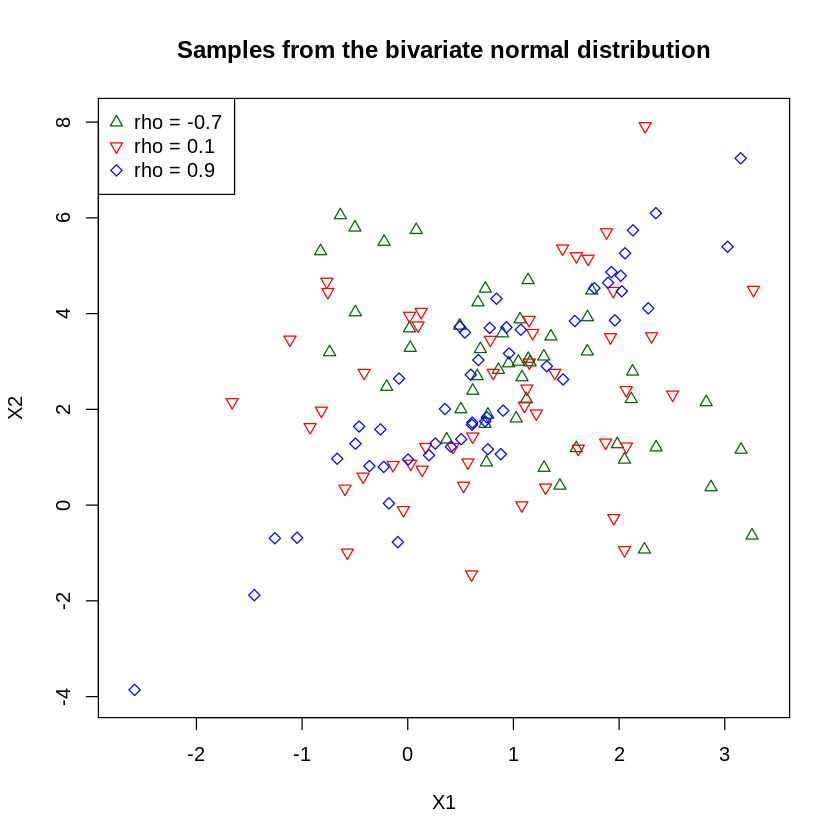

In [ ]:
# find the range of the petal width and length in the dataset
x_min <- min(c(min(samples_f1[,1]), min(samples_f2[,1]), min(samples_f3[,1]))) - .1
x_max <- max(c(max(samples_f1[,1]), max(samples_f2[,1]), max(samples_f3[,1]))) + .1
y_min <- min(c(min(samples_f1[,2]), min(samples_f2[,2]), min(samples_f3[,2]))) - .1
y_max <- max(c(max(samples_f1[,2]), max(samples_f2[,2]), max(samples_f3[,2]))) + .1


#Create the plot for x0(versicolor) (single coloring)
plot(samples_f1,
  type = "p", # dot plot
  pch = 24,
  col = "darkgreen",
  main = "Samples from the bivariate normal distribution", #Title
  xlab = "X1", # X-axis Lable,
  ylab = "X2", # Y-axis Lable
  xlim = c(x_min, x_max), # Set x-axis limits
  ylim = c(y_min, y_max) # Set y-axis limit
)

# add the second set x1 (Virginica)
points(samples_f2,
  type = "p", # dot plot
  pch = 25,
  col = "red"
)

# add the third set x1 (Virginica)
points(samples_f3,
  type = "p", # dot plot
  pch = 23,
  col = "blue"
)
legend("topleft", legend = c("rho = -0.7", "rho = 0.1", "rho = 0.9"),
      col = c("darkgreen", "red", "blue"),
      pch = c(24, 25, 23)
)

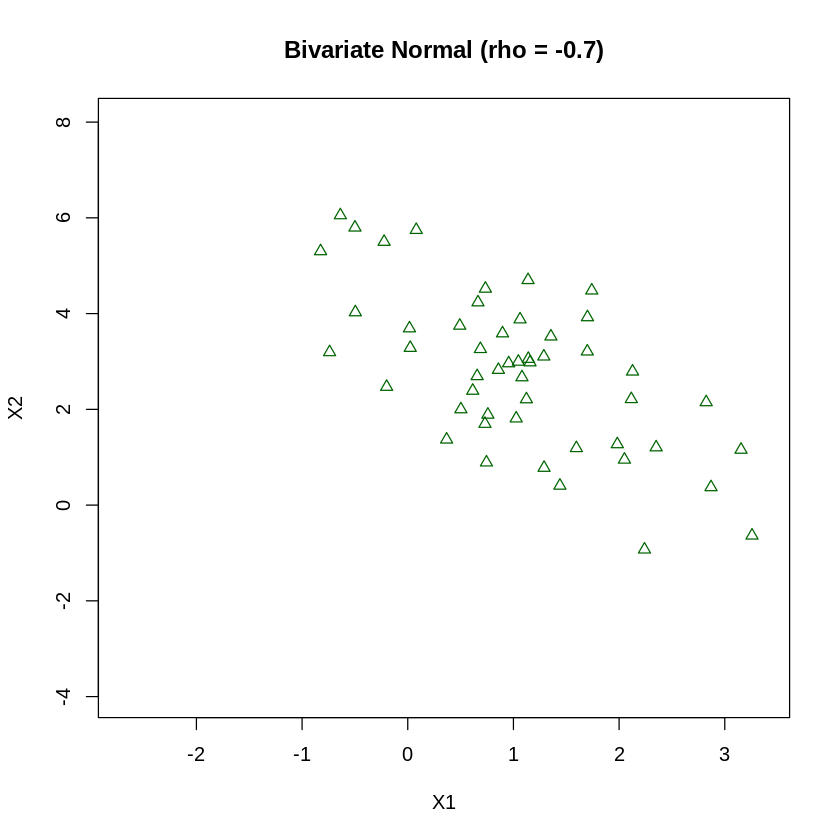

In [ ]:
# Plot for samples_f1 (rho = -0.7)
plot(samples_f1,
    main = "Bivariate Normal (rho = -0.7)",
    pch = 24,
    col = "darkgreen",
    xlab = "X1", ylab = "X2",
    xlim = c(x_min, x_max), ylim = c(y_min, y_max))  # Setting plot limits

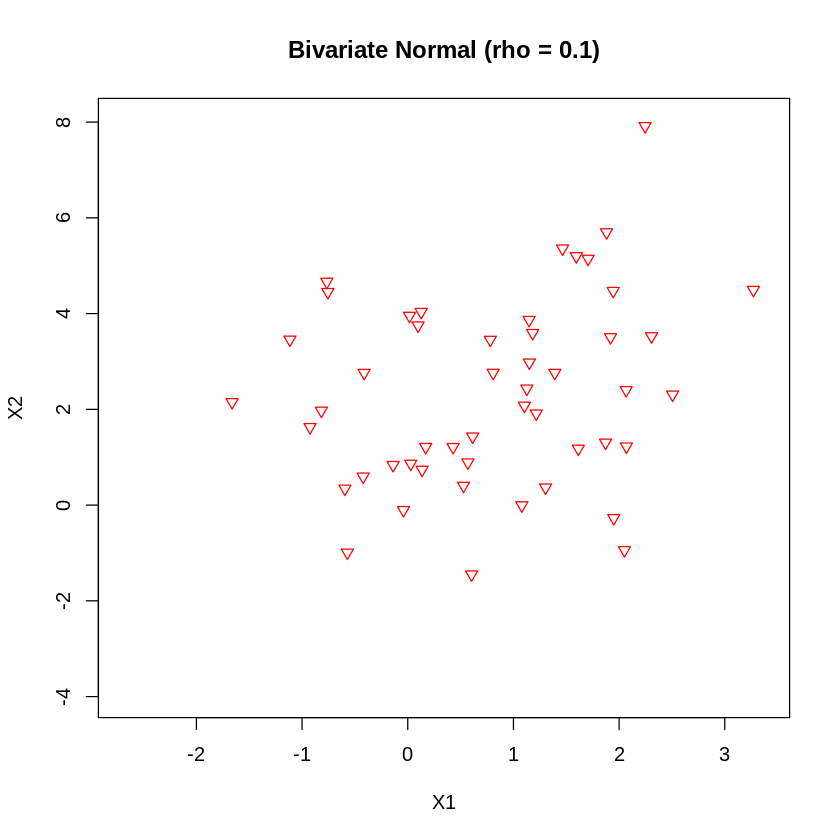

In [ ]:
# Plot for samples_f2 (rho = 0.1)
plot(samples_f2,
    main = "Bivariate Normal (rho = 0.1)",
    pch = 25,
    col = "red",
    xlab = "X1", ylab = "X2",
    xlim = c(x_min, x_max), ylim = c(y_min, y_max))  # Setting plot limits

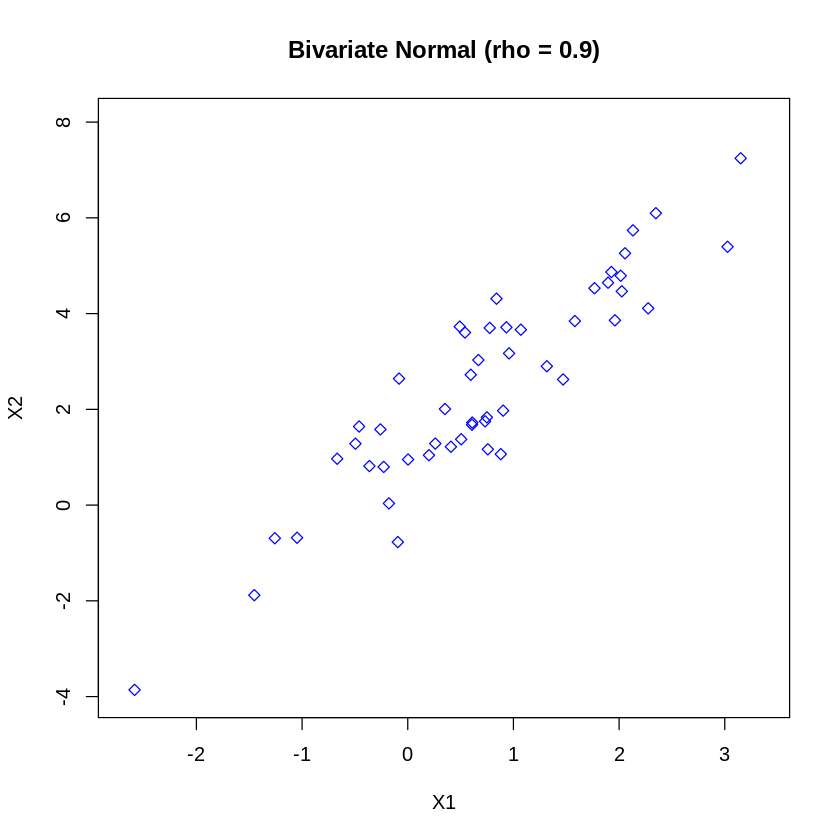

In [ ]:
# Plot for samples_f3 (rho = 0.9)
plot(samples_f3,
    main = "Bivariate Normal (rho = 0.9)",
    pch = 23,
    col = "blue",
    xlab = "X1", ylab = "X2",
    xlim = c(x_min, x_max), ylim = c(y_min, y_max))  # Setting plot limits



---


(Question: G) Take μ1 = 1, μ2 = 3, ρ = 0.7, σ2
1 = 1 and σ2
2 = 3. This corresponds to
Σ =
 1 0.7√3
0.7√3 3

and μ =
1
3

.
Generate 50 realizations from the bivariate normal distribution with these parameters and store the result in a 50 × 2 matrix M . Issue the commands
colMeans(M)
and
cov(M)
Repeat this using and 10 000 realizations. Verify that, as the number of realiza-
tions gets larger, we approximate μ and Σ with increasing precision.
The point is that estimates for μ and Σ can be obtained by issuing the commands
colMeans(M) and cov(M) respectively, if the data are in a 2-column matrix M

In [ ]:
# Parameters
mu1 <- 1
mu2 <- 2
rho <- 0.7
sigma1 <- 1 # Squareroot of 1 = 1
sigma2 <- sqrt(3) # sigma2 is the standard deviation and no the variance thus I applied the squareroot.

# generate realizations
M_50 <- rbinorm(n= 50, mu1, mu2, rho, sigma1, sigma2)
M_10000 <- rbinorm(n = 10000, mu1, mu2, rho, sigma1, sigma2)

In [ ]:
# calculate the means and covariance for 50
means_50 <- colMeans(M_50)
covariance_50 <- cov(M_50)

# calculeat the means and covariance for 10000
means_10000 <- colMeans(M_10000)
covariance_10000 <- cov(M_10000)

In [ ]:
#Verification
# True values
true_mu <- c(mu1, mu2)
true_sigma <- matrix(c(sigma1^2, rho * sigma1 * sigma2,
                       rho * sigma1 * sigma2, sigma2^2), nrow = 2)

# Compare sample means to true mu
print("Sample means (50 realizations):")
print(means_50)
print("Sample means (10,000 realizations):")
print(means_10000)
print("True mu:")
print(true_mu)

# Compare sample covariance to true sigma
print("Sample covariance (50 realizations):")
print(covariance_50)
print("Sample covariance (10,000 realizations):")
print(covariance_10000)
print("True sigma:")
print(true_sigma)

[1] "Sample means (50 realizations):"
       X1        X2 
0.9446189 1.9255494 
[1] "Sample means (10,000 realizations):"
      X1       X2 
1.005875 2.012814 
[1] "True mu:"
[1] 1 2
[1] "Sample covariance (50 realizations):"
          X1       X2
X1 0.9269409 0.826736
X2 0.8267360 2.310884
[1] "Sample covariance (10,000 realizations):"
         X1       X2
X1 1.029078 1.234572
X2 1.234572 2.993588
[1] "True sigma:"
         [,1]     [,2]
[1,] 1.000000 1.212436
[2,] 1.212436 3.000000


*(Verify that, as the number of realizations gets larger, we approximate μ and Σ with increasing precision.)*

Indeed as n increases the true vallues of mu1 and mu2 are better approximated.


---



### Back to the classification problem
### (Question: H)
Model the flowers of type 0 by a bivariate normal distribution with mean-vector
μ0 and variance-covariance matrix Σ0. Estimate μ0 and Σ0 from the data corresponding to flower type 0 (that is, Iris versicolor). Call these estimates ˆμ0 and ˆΣ0
respectively.

In [ ]:
# Estimate mu0 (mean vector) for type 0 (versicolor) using x0
mu0_hat <- colMeans(x0)

# Estimate sigma0 (variance-covariance matrix) for type 0 (versicolor) using x0
sigma0_hat <- cov(x0)

# Print the estimated parameters
print("Estimated mu0:")
print(mu0_hat)
print("Estimated sigma0:")
print(sigma0_hat)

[1] "Estimated mu0:"
Petal.Length  Petal.Width 
       4.260        1.326 
[1] "Estimated sigma0:"
             Petal.Length Petal.Width
Petal.Length   0.22081633  0.07310204
Petal.Width    0.07310204  0.03910612


### (Question: I)
Model the flowers of type 1 by a bivariate normal distribution with mean-vector
μ1 and variance-covariance matrix Σ1. Estimate μ1 and Σ1 from the data corre-
sponding to flower type 1 (that is, Iris virginica). Call these estimates ˆμ1 and ˆΣ1
respectively.

In [ ]:
# Estimate mu0 (mean vector) for type 0 (versicolor) using x0
mu1_hat <- colMeans(x1)

# Estimate sigma0 (variance-covariance matrix) for type 0 (versicolor) using x0
sigma1_hat <- cov(x1)

# Print the estimated parameters
print("Estimated mu1:")
print(mu1_hat)
print("Estimated sigma1:")
print(sigma1_hat)

[1] "Estimated mu1:"
Petal.Length  Petal.Width 
       5.552        2.026 
[1] "Estimated sigma1:"
             Petal.Length Petal.Width
Petal.Length   0.30458776  0.04882449
Petal.Width    0.04882449  0.07543265


(Question: J) Prove the following: If we plug-in bivariate normal probability density functions
into (2), together with estimates of their parameters, our classification rule boils
down to the following: Given petal length and width measurements x, choose type
0 if r2
0 (x) < log det ˆΣ1
det ˆΣ0
+ 2 log ˆp0
ˆp1
+ r2
1 (x),


else choose type 1.

Here
r2
k(x) = (x − ˆμk)T ˆΣ−1
k (x − ˆμk) k ∈ {0, 1}.
4


Answer:

We want to show that if we assume our data follows a bivariate normal distribution, then our classification rule can be simplified to the following:

Choose type 0 if r²0(x) < log(det(ˆΣ1) / det(ˆΣ0)) + 2 * log(ˆp0 / ˆp1) + r²1(x)
Choose type 1 otherwise
where r²k(x) is a measure of how far a data point x is from the center of class k.

---
(Question: K) Implement this classification rule. Suppose I have a flower with petal length equal
to 5 cm and petal width equal to 1.8 cm, so that x = [5, 1.8]T . Is this flower of
type versicolor or virginica according to our classification rule?

### Finished by David Linger #2741629 on 24/03/2025
